In [1]:
import pandas as pd
import numpy as np
import time
import warnings
import shap
from statwolfml import Builder
from data_science.modules.feature_importance import create as create_FI
from data_science.modules.load_dataset import create as create_ld
from data_science.modules.dataframe_utils import create as create_utils

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Full Boston dataset

In [3]:
dataframe = create_ld().load_boston().dataframe()

In [4]:
features = dataframe.drop(columns={'target'}).columns

In [5]:
create_utils().dataset_resume_table(dataframe).dataframe()

,name,type,valorized,missing,mean,std,min,25%,50%,75%,max,entropy,first_value,first_count,second_value,second_count
0,CRIM,float64,506,0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762,8.98,14.3337,2.0,0.01501,2.0
1,ZN,float64,506,0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,1.95,0.0000,372.0,20.00000,21.0
2,INDUS,float64,506,0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,5.03,18.1000,132.0,19.58000,30.0
3,CHAS,float64,506,0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,0.36,0.0000,471.0,1.00000,35.0
4,NOX,float64,506,0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,6.00,0.5380,23.0,0.71300,18.0
5,RM,float64,506,0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,8.74,6.1670,3.0,6.22900,3.0
6,AGE,float64,506,0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,8.05,100.0000,43.0,96.00000,4.0
7,DIS,float64,506,0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,8.57,3.4952,5.0,5.28730,4.0
8,RAD,float64,506,0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,2.74,24.0000,132.0,5.00000,115.0
9,TAX,float64,506,0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,4.83,666.0000,132.0,307.00000,40.0


In [12]:
model = 'cat_boost_regressor'
build_model = Builder(model).feature_names(features).labels(['target']).build()
train_model = build_model.train(dataframe)

In [13]:
time_start = time.clock()
explainer = shap.TreeExplainer(train_model.base_model()['model'])
shap_values = explainer.shap_values(dataframe.drop(columns='target'))
time.clock() - time_start

1.6478110000000008

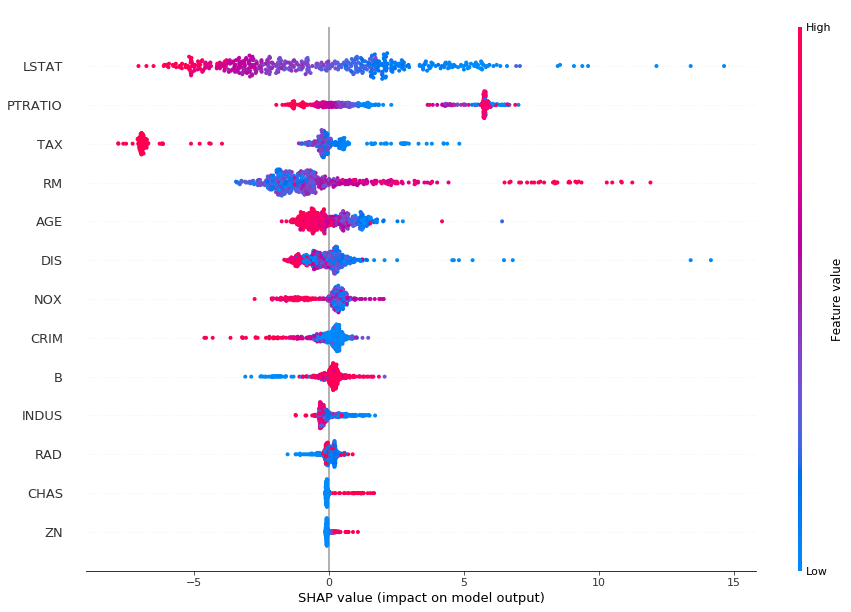

In [15]:
shap.summary_plot(shap_values,dataframe.drop(columns=['target']),plot_size=(15,10))